# Introduction

The aim of this notebook is to play around with network diagrams and D3.js powered force directed graphs of the Spooky Author dataset. Namely, we will be looking at network graphs on the top bigrams and trigrams attributed to each Author via the NetworkX package. After which, the brilliant D3.js javascript library will be used to generate interactive force directed graphs on a host of other summary numbers such as the top stopwords.

**1. Network of Trigrams and Bigrams**: 

**2. Force-directed graphs with D3.js**: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nltk
from nltk.util import ngrams
%matplotlib inline

In [2]:
train = pd.read_csv("input/train.csv")

# 1. Networks of Tri-grams and Bi-grams

For the first chapter, we will investigate the top Tri-and-Bi grams associated to each author and perhaps visualize this relationship more intuitively with a network diagram.

**Function to generate ngram value counts**

In [3]:
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

## 1a. Generating network of Trigram counts

For starters, I have hidden the code for creating the various dataframes just to keep the code tighter but essentially, I save the ngrams counts into a dictionary which simply feeds into a Pandas dataframe. Taking a quick peek into the top 3 Trigrams attributed to the authors we see the following:

In [5]:
# DataFrame for Mary Shelley
ngrams = {}
for title in train[train.author=="MWS"]['text']:
        for ngram in generate_ngrams(title, 3):
            ngram = ' '.join(ngram)
            if ngram in  ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_mws_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_mws_df.columns = ['count']
ngrams_mws_df['author'] = 'Mary Shelley'
ngrams_mws_df.reset_index(level=0, inplace=True)

# DataFrame for Edgar Allen Poe
ngrams = {}
for title in train[train.author=="EAP"]['text']:
        for ngram in generate_ngrams(title, 3):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_eap_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_eap_df.columns = ['count']
ngrams_eap_df['author'] = 'Edgar Allen Poe'
ngrams_eap_df.reset_index(level=0, inplace=True)

# DataFrame for HP Lovecraft
ngrams = {}
for title in train[train.author=="HPL"]['text']:
        for ngram in generate_ngrams(title, 3):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_hpl_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_hpl_df.columns = ['count']
ngrams_hpl_df['author'] = 'HP lovecraft'
ngrams_hpl_df.reset_index(level=0, inplace=True)

In [7]:
ngrams_eap_df.sort_values(by='count', ascending=False).head(3)

,index,count,author
3079,one of the,77,Edgar Allen Poe
2984,I could not,64,Edgar Allen Poe
6337,as well as,47,Edgar Allen Poe


In [8]:
ngrams_hpl_df.sort_values(by='count', ascending=False).head(3)

,index,count,author
1514,. . .,77,HP lovecraft
9091,out of the,48,HP lovecraft
1622,one of the,45,HP lovecraft


In [10]:
ngrams_mws_df.sort_values(by='count', ascending=False).head(3)

,index,count,author
6392,I did not,39,Mary Shelley
9542,I could not,36,Mary Shelley
669,which I had,36,Mary Shelley


## NetworkX Graphs

Cool. Now that we have generated our Trigram counts on an author basis we can start generating our NetworkX graphs. The thing to note here is that we will be returning the top 20 Trigrams attributed to each author.

In [11]:
trigram_df = pd.concat([ngrams_eap_df.sort_values(by='count', ascending=False).head(20),
                        ngrams_hpl_df.sort_values(by='count', ascending=False).head(20),
                        ngrams_mws_df.sort_values(by='count', ascending=False).head(20)])

NetworkX contains a very convenient function which takes in a Pandas dataframe as input where you are able to the specify the source and target columns.

In [13]:
g = nx.from_pandas_dataframe(trigram_df,source='author',target= "index")
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 48
Number of edges: 60
Average degree:   2.5000


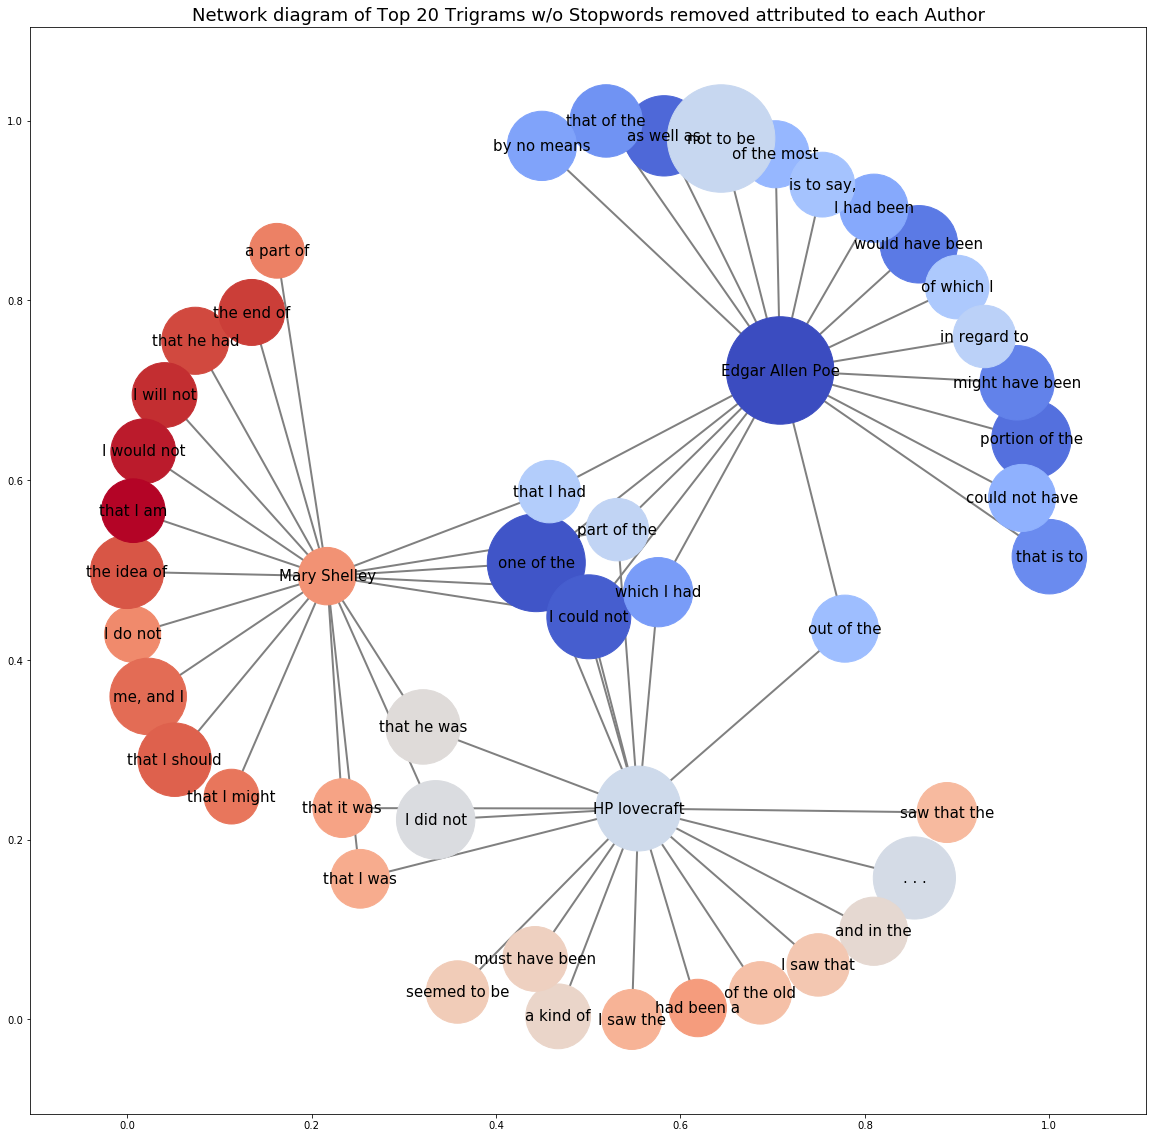

In [14]:
plt.figure(figsize=(20, 20))
cmap = plt.cm.coolwarm
colors = [n for n in range(len(g.nodes()))]
#k = 0.0319
k = 0.14
pos=nx.spring_layout(g, k=k)
nx.draw_networkx(g,pos, node_size=trigram_df['count'].values*150, cmap = cmap, 
                 node_color=colors, edge_color='grey', font_size=15, width=2, alpha=1)
plt.title("Network diagram of Top 20 Trigrams w/o Stopwords removed attributed to each Author",
         fontsize=18)
plt.show()

From the network graph we can see that there are certain popular trigrams used recurringly by our three spooky authors. These trigrams however seem commonplace in the sense that they involve combinations of very common words, therefore a higher probability of being shared by the same author. Perhaps it might also be interesting to observe the trigram network after removing stopwords and therefore this will be exactly what we will do next.

## Trigrams with stopword cleansing



---

## 1b.Network of Bigram counts

Following a similar procedure to the trigram network plot, we generate our top 20 bigrams attributed to each author. Unhide the cell below for the code.

In [15]:
# DataFrame for Mary Shelley
ngrams = {}
for title in train[train.author=="MWS"]['text']:
        for ngram in generate_ngrams(title, 2):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_mws_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_mws_df.columns = ['count']
ngrams_mws_df['author'] = 'Mary Shelley'
ngrams_mws_df.reset_index(level=0, inplace=True)

# DataFrame for Edgar Allen Poe
ngrams = {}
for title in train[train.author=="EAP"]['text']:
        for ngram in generate_ngrams(title, 2):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_eap_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_eap_df.columns = ['count']
ngrams_eap_df['author'] = 'Edgar Allen Poe'
ngrams_eap_df.reset_index(level=0, inplace=True)

# DataFrame for HP Lovecraft
ngrams = {}
for title in train[train.author=="HPL"]['text']:
        for ngram in generate_ngrams(title, 2):
            ngram = ' '.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

ngrams_hpl_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_hpl_df.columns = ['count']
ngrams_hpl_df['author'] = 'HP lovecraft'
ngrams_hpl_df.reset_index(level=0, inplace=True)

In [16]:
bigram_df = pd.concat( [ngrams_eap_df.sort_values(by='count', ascending=False).head(20),
                        ngrams_hpl_df.sort_values(by='count', ascending=False).head(20),
                        ngrams_mws_df.sort_values(by='count', ascending=False).head(20)])

Generating the Bigram network (Top 20 Bigrams) we get:

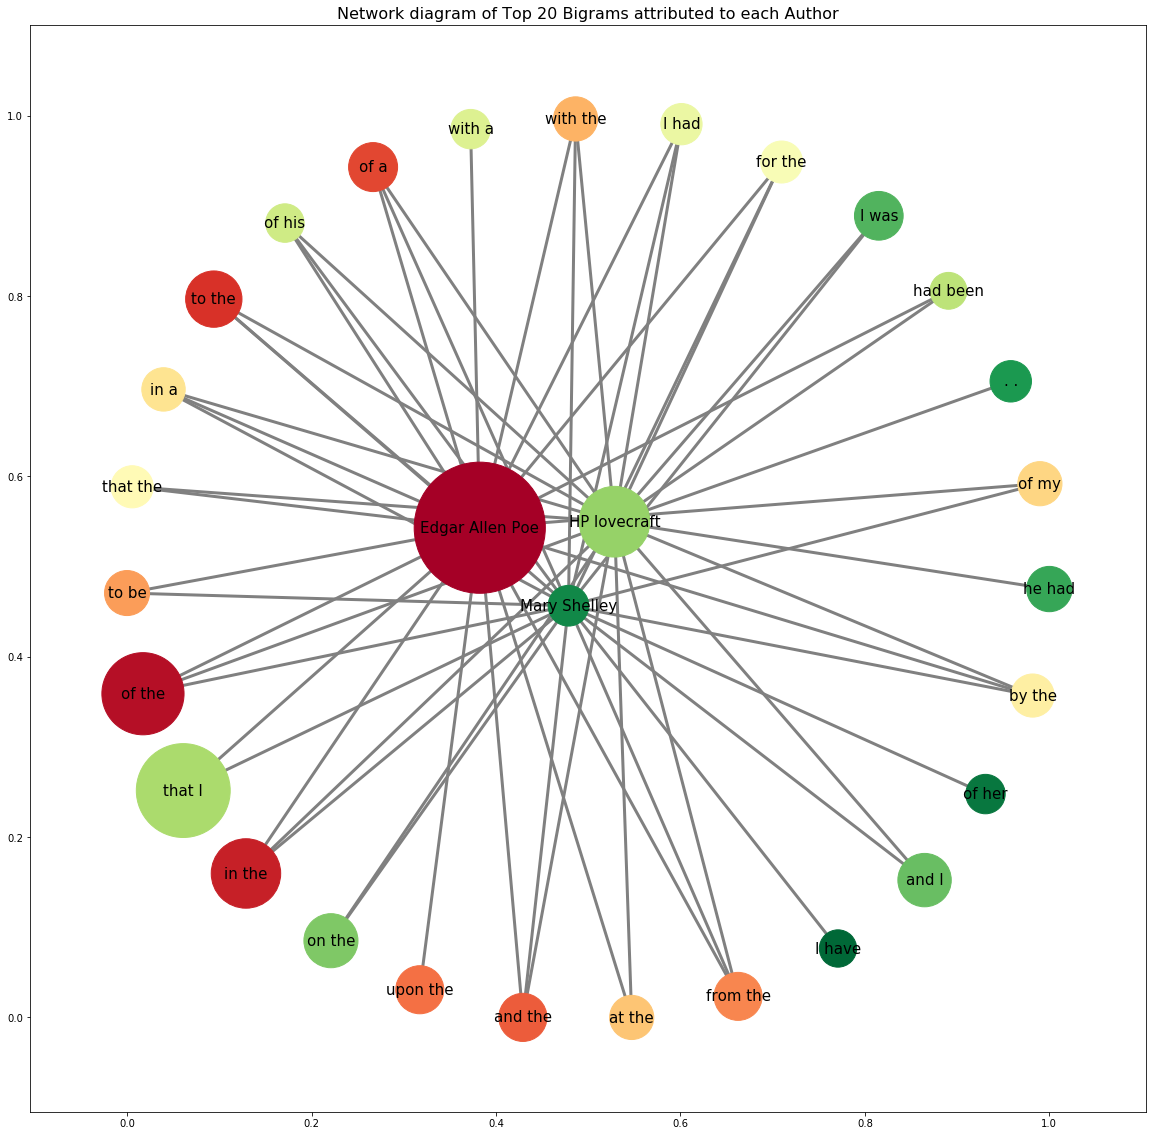

In [17]:
del g
g = nx.from_pandas_dataframe(bigram_df,source='author',target='index')
plt.figure(figsize=(20, 20))
cmap = plt.cm.RdYlGn
colors = [n for n in range(len(g.nodes()))]
plt.figure(figsize=(20, 20))
k = 0.35
pos=nx.spring_layout(g, k=k)
nx.draw_networkx(g,pos, node_size=bigram_df['count'].values*6, cmap = cmap, 
                 node_color=colors, edge_color='grey', font_size=15, width=3)
plt.title("Network diagram of Top 20 Bigrams attributed to each Author", fontsize=16)
plt.show()

# 2. Force-directed graphs with D3.js 

The following force directed graph was inspired by Mike Bostock's site on D3.js examples : [Force-Directed Graph](http://bl.ocks.org/mbostock/2706022), so do check it out as there are a lot of brilliant D3 example visuals on his page for one to adapt and play around with.


In [18]:
import json, random
import IPython.display
from IPython.core.display import display, HTML, Javascript
import json, random
from string import Template

The code to generate the top 20 stopwords attributed to each author is given via the follow cell:

In [19]:
stopwords = {
"nodes": [
 {"id": "Edgar Allen Poe", "group": 1},
 {"id": "HP Lovecraft", "group": 2},
 {"id": "Mary Shelley", "group": 3},
 {"id": "and"	, "group": 1},
 {"id": "is"	, "group": 1},
 {"id": "it"	, "group": 1},
 {"id": "an"	, "group": 1},
 {"id": "as"	, "group": 1},
 {"id": "at"	, "group": 1},
 {"id": "have"	, "group": 1},
 {"id": "in"	, "group": 1},
 {"id": "from"	, "group": 1},
 {"id": "for"	, "group": 1},
 {"id": "no"	, "group": 1},
 {"id": "had"	, "group": 1},
 {"id": "to"	, "group": 1},
 {"id": "which" , "group": 1},
 {"id": "was"	, "group": 1},
 {"id": "be"	, "group": 1},
 {"id": "his"	, "group": 1},
 {"id": "that"	, "group": 1},
 {"id": "but"	, "group": 1},
 {"id": "not"	, "group": 1},
 {"id": "with"	, "group": 1},
 {"id": "by"	, "group": 1},
 {"id": "he"	, "group": 1},
 {"id": "a"		, "group": 1},
 {"id": "this"	, "group": 1},
 {"id": "of"	, "group": 1},
 {"id": "so"	, "group": 1},
 {"id": "the"	, "group": 1},
 {"id": "my"	, "group": 1},
 {"id": "or"	, "group": 1},
 {"id": "and"   , "group": 2},
 {"id": "all"   , "group": 2},
 {"id": "it"    , "group": 2},
 {"id": "an"    , "group": 2},
 {"id": "as"    , "group": 2},
 {"id": "at"    , "group": 2},
 {"id": "in"    , "group": 2},
 {"id": "from"  , "group": 2},
 {"id": "for"	, "group": 2},
 {"id": "had"	, "group": 2},
 {"id": "to"	, "group": 2},
 {"id": "which"	, "group": 2},
 {"id": "was"	, "group": 2},
 {"id": "be"	, "group": 2},
 {"id": "his"	, "group": 2},
 {"id": "that"	, "group": 2},
 {"id": "but"	, "group": 2},
 {"id": "me"	, "group": 2},
 {"id": "they"	, "group": 2},
 {"id": "not"	, "group": 2},
 {"id": "with"	, "group": 2},
 {"id": "by"	, "group": 2},
 {"id": "he"	, "group": 2},
 {"id": "a"		, "group": 2},
 {"id": "on"	, "group": 2},
 {"id": "of"	, "group": 2},
 {"id": "were"	, "group": 2},
 {"id": "the"	, "group": 2},
 {"id": "my"	, "group": 2},
 {"id": "or"	, "group": 2},
 {"id": "and"	, "group": 3},
 {"id": "be"	, "group": 3},
 {"id": "is"	, "group": 3},
 {"id": "it"	, "group": 3},
 {"id": "as"	, "group": 3},
 {"id": "in"	, "group": 3},
 {"id": "from"	, "group": 3},
 {"id": "for"	, "group": 3},
 {"id": "had"	, "group": 3},
 {"id": "to"	, "group": 3},
 {"id": "which"	, "group": 3},
 {"id": "you"	, "group": 3},
 {"id": "was"	, "group": 3},
 {"id": "me"	, "group": 3},
 {"id": "his"	, "group": 3},
 {"id": "that"	, "group": 3},
 {"id": "but"	, "group": 3},
 {"id": "not"	, "group": 3},
 {"id": "with"	, "group": 3},
 {"id": "by"	, "group": 3},
 {"id": "he"	, "group": 3},
 {"id": "a"		, "group": 3},
 {"id": "on"	, "group": 3},
 {"id": "her"	, "group": 3},
 {"id": "this"	, "group": 3},
 {"id": "of"	, "group": 3},
 {"id": "she"	, "group": 3},
 {"id": "were"	, "group": 3},
 {"id": "the"	, "group": 3},
 {"id": "my"	, "group": 3}
],
"links": [
 {"source": "Edgar Allen Poe", "target": "and"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "is"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "it"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "an"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "as"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "at"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "have"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "in"	, "value": 1},	
 {"source": "Edgar Allen Poe", "target": "from"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "for"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "no"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "had"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "to"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "which", "value": 1},
 {"source": "Edgar Allen Poe", "target": "was"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "be"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "his"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "that"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "but"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "not"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "with"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "by"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "he"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "a"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "this"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "of"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "so"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "the"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "my"	, "value": 1},
 {"source": "Edgar Allen Poe", "target": "or"	, "value": 1},
 {"source": "HP Lovecraft", "target": "and"   	, "value": 2},
 {"source": "HP Lovecraft", "target": "all"   	, "value": 2},
 {"source": "HP Lovecraft", "target": "it"    	, "value": 2},
 {"source": "HP Lovecraft", "target": "an"    	, "value": 2},
 {"source": "HP Lovecraft", "target": "as"    	, "value": 2},
 {"source": "HP Lovecraft", "target": "at"    	, "value": 2},
 {"source": "HP Lovecraft", "target": "in"    	, "value": 2},
 {"source": "HP Lovecraft", "target": "from"  	, "value": 2},
 {"source": "HP Lovecraft", "target": "for"		, "value": 2},
 {"source": "HP Lovecraft", "target": "had"		, "value": 2},
 {"source": "HP Lovecraft", "target": "to"		, "value": 2},
 {"source": "HP Lovecraft", "target": "which"	, "value": 2},
 {"source": "HP Lovecraft", "target": "was"		, "value": 2},
 {"source": "HP Lovecraft", "target": "be"		, "value": 2},
 {"source": "HP Lovecraft", "target": "his"		, "value": 2},
 {"source": "HP Lovecraft", "target": "that"	, "value": 2},
 {"source": "HP Lovecraft", "target": "but"		, "value": 2},
 {"source": "HP Lovecraft", "target": "me"		, "value": 2},
 {"source": "HP Lovecraft", "target": "they"	, "value": 2},
 {"source": "HP Lovecraft", "target": "not"		, "value": 2},
 {"source": "HP Lovecraft", "target": "with"	, "value": 2},
 {"source": "HP Lovecraft", "target": "by"		, "value": 2},
 {"source": "HP Lovecraft", "target": "he"		, "value": 2},
 {"source": "HP Lovecraft", "target": "a"		, "value": 2},
 {"source": "HP Lovecraft", "target": "on"		, "value": 2},
 {"source": "HP Lovecraft", "target": "of"		, "value": 2},
 {"source": "HP Lovecraft", "target": "were"	, "value": 2},
 {"source": "HP Lovecraft", "target": "the"		, "value": 2},
 {"source": "HP Lovecraft", "target": "my"		, "value": 2},
 {"source": "HP Lovecraft", "target": "or"		, "value": 2},
 {"source": "Mary Shelley", "target": "and"		, "value": 3},
 {"source": "Mary Shelley", "target": "be"		, "value": 3},
 {"source": "Mary Shelley", "target": "is"		, "value": 3},
 {"source": "Mary Shelley", "target": "it"		, "value": 3},
 {"source": "Mary Shelley", "target": "as"		, "value": 3},
 {"source": "Mary Shelley", "target": "in"		, "value": 3},
 {"source": "Mary Shelley", "target": "from"	, "value": 3},
 {"source": "Mary Shelley", "target": "for"		, "value": 3},
 {"source": "Mary Shelley", "target": "had"		, "value": 3},
 {"source": "Mary Shelley", "target": "to"		, "value": 3},
 {"source": "Mary Shelley", "target": "which"	, "value": 3},
 {"source": "Mary Shelley", "target": "you"		, "value": 3},
 {"source": "Mary Shelley", "target": "was"		, "value": 3},
 {"source": "Mary Shelley", "target": "me"		, "value": 3},
 {"source": "Mary Shelley", "target": "his"		, "value": 3},
 {"source": "Mary Shelley", "target": "that"	, "value": 3},
 {"source": "Mary Shelley", "target": "but"		, "value": 3},
 {"source": "Mary Shelley", "target": "not"		, "value": 3},
 {"source": "Mary Shelley", "target": "with"	, "value": 3},
 {"source": "Mary Shelley", "target": "by"		, "value": 3},
 {"source": "Mary Shelley", "target": "he"		, "value": 3},
 {"source": "Mary Shelley", "target": "a"		, "value": 3},
 {"source": "Mary Shelley", "target": "on"		, "value": 3},
 {"source": "Mary Shelley", "target": "her"		, "value": 3},
 {"source": "Mary Shelley", "target": "this"	, "value": 3},
 {"source": "Mary Shelley", "target": "of"		, "value": 3},
 {"source": "Mary Shelley", "target": "she"		, "value": 3},
 {"source": "Mary Shelley", "target": "were"	, "value": 3},
 {"source": "Mary Shelley", "target": "the"		, "value": 3},
 {"source": "Mary Shelley", "target": "my"		, "value": 3}
 ]
 }
with open('stopwords.json', 'w') as outfile:  
    json.dump(stopwords, outfile)

Uncomment to see the HTML embedding

In [20]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.links line {
  stroke: #999;
  stroke-opacity: 0.6;
}

.nodes circle {
  stroke: #fff;
  stroke-width: 3px;
}

text {
  font-family: sans-serif;
  font-size: 12px;
}

</style>
<svg width="960" height="500"></svg>
"""
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

  var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height");

var color = d3.scaleOrdinal(d3.schemeCategory20);

var simulation = d3.forceSimulation()
    .force("link", d3.forceLink().distance(170).strength(0.5).id(function(d) { return d.id; }))
    .force("charge", d3.forceManyBody())
    .force("center", d3.forceCenter(width/2 , height/2 ));

d3.json("stopwords.json", function(error, graph) {
  if (error) throw error;

  var link = svg.append("g")
      .attr("class", "links")
    .selectAll("line")
    .data(graph.links)
    .enter().append("line")
      .attr("stroke-width", function(d) { return Math.sqrt(d.value); });

  var node = svg.append("g")
      .attr("class", "nodes")
    .selectAll("g")
    .data(graph.nodes)
    .enter().append("g")
    
  var circles = node.append("circle")
      .attr("r", 8)
      .attr("fill", function(d) { return color(d.group); })
      .call(d3.drag()
          .on("start", dragstarted)
          .on("drag", dragged)
          .on("end", dragended));

  var lables = node.append("text")
      .text(function(d) {
        return d.id;
      })
      .attr('x', 6)
      .attr('y', 3);

  node.append("title")
      .text(function(d) { return d.id; });

  simulation
      .nodes(graph.nodes)
      .on("tick", ticked);

  simulation.force("link")
      .links(graph.links);

  function ticked() {
    link
        .attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node
        .attr("transform", function(d) {
          return "translate(" + d.x + "," + d.y + ")";
        })
  }
});

function dragstarted(d) {
  if (!d3.event.active) simulation.alphaTarget(0.9).restart();
  d.fx = d.x;
  d.fy = d.y;
}

function dragged(d) {
  d.fx = d3.event.x;
  d.fy = d3.event.y;
}

function dragended(d) {
  if (!d3.event.active) simulation.alphaTarget(0);
  d.fx = null;
  d.fy = null;
}  
    
  });
 """
h = IPython.display.display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

*[THE VISUALISATION IS INTERACTIVE SO PLEASE CLICK AND DRAG ON THE CIRCLES TO MOVE THE NETWORK]*

# *To be continued*